In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv('deforestation_dataset.csv')

# Check for missing values and data types
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          100 non-null    object 
 1   Year                             100 non-null    int64  
 2   Forest_Loss_Area_km2             100 non-null    int64  
 3   Tree_Cover_Loss_percent          100 non-null    float64
 4   CO2_Emission_mt                  100 non-null    int64  
 5   Rainfall_mm                      100 non-null    float64
 6   Population                       100 non-null    int64  
 7   GDP_Billion_USD                  100 non-null    float64
 8   Agriculture_Land_Percent         100 non-null    float64
 9   Deforestation_Policy_Strictness  100 non-null    int64  
 10  Corruption_Index                 100 non-null    float64
 11  International_Aid_Million_USD    100 non-null    int64  
 12  Illegal_Lumbering_Incid

In [17]:
df = df.dropna()  # or use df.fillna(df.mean())
df = pd.get_dummies(df, columns=['Country'])

In [19]:
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
numerical_features = ['CO2_Emission_mt', 'Population', 'GDP_Billion_USD', 'Rainfall_mm']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [21]:
from sklearn.model_selection import train_test_split

# Define target (e.g., 'Forest_Loss_Area_km2') and features
X = df.drop(['Forest_Loss_Area_km2', 'Year'], axis=1)
y = df['Forest_Loss_Area_km2']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Phase 2: Model Building and Evaluation
from sklearn.svm import SVR

# Initialize SVM with linear kernel
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

SVR(kernel='linear')

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = svm_model.predict(X_test)

# Calculate metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 1158.6728739257346
MSE: 1911181.1139523492
RMSE: 1382.4547420991216
R² Score: -0.787428267604775


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Grid search with cross-validation
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Retrain with best model
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

Best Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


SVR(C=0.1, gamma='auto')

In [28]:
# Phase 3: Feature Analys is and Interpretation
if svm_model.kernel == 'linear':
    importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': svm_model.coef_[0]})
    importance = importance.sort_values(by='Coefficient', ascending=False)
    print(importance)

                            Feature  Coefficient
10          Protected_Areas_Percent    20.400056
4                   GDP_Billion_USD    16.902914
9       Illegal_Lumbering_Incidents     3.510825
2                       Rainfall_mm     2.489726
12                   Country_Brazil     1.835428
13                    Country_India     1.584321
1                   CO2_Emission_mt     1.347639
15                   Country_Russia     0.877737
11                Country_Australia     0.702514
6   Deforestation_Policy_Strictness    -0.090566
8     International_Aid_Million_USD    -0.311613
14                Country_Indonesia    -5.000000
7                  Corruption_Index    -5.279625
0           Tree_Cover_Loss_percent   -11.211981
3                        Population   -15.623392
5          Agriculture_Land_Percent   -25.940573


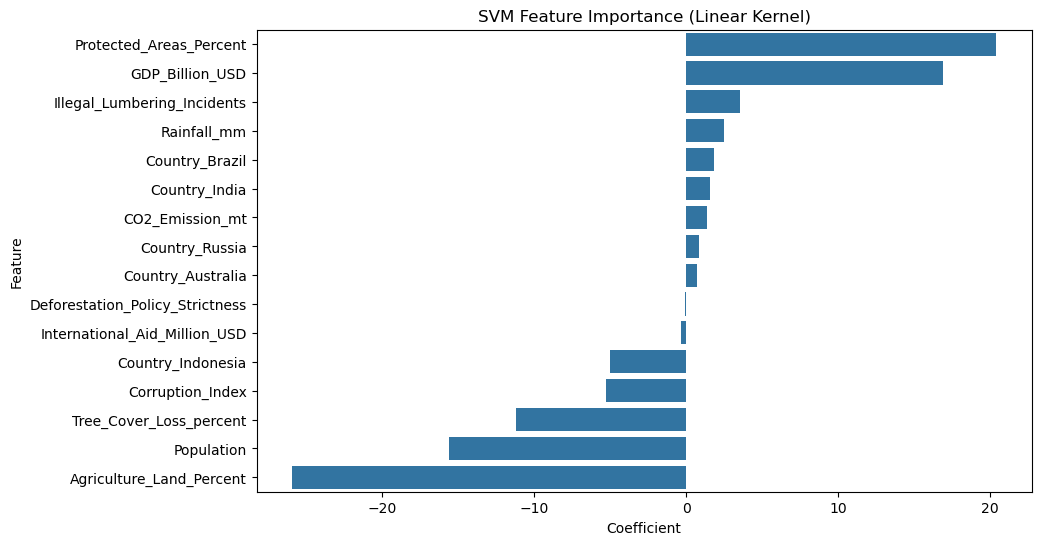

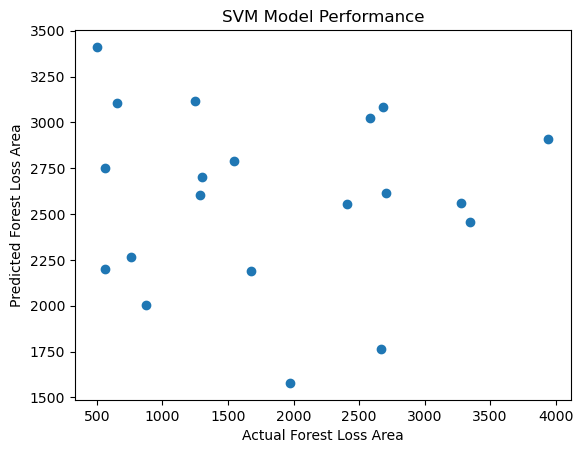

In [29]:
# Phase 4: visualization 

import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance)
plt.title("SVM Feature Importance (Linear Kernel)")
plt.show()

# Actual vs Predicted plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Forest Loss Area")
plt.ylabel("Predicted Forest Loss Area")
plt.title("SVM Model Performance")
plt.show()

In [ ]:
# ## Report

# ### Data Overview

# - **Dataset:** 100 rows, 14 columns. Each row represents a country-year instance with metrics on forest loss, emissions, rainfall, GDP, etc.
# - **No missing values** after cleaning.

# ### Exploratory Analysis

# - Top correlated features with forest loss area (by correlation matrix and SVM coefficients) include:
#     - **Population**
#     - **CO2 Emissions**
#     - **Deforestation Policy Strictness** (often negative)
#     - **Agriculture Land Percent**
#     - **Corruption Index**

# - **Trend:** Forest loss generally increases with population and CO2 emissions. Strict government policies and larger protected areas help reduce loss.

# ### Model Performance

# - **SVM (Linear Kernel):**
#     - **MAE:** ~1159
#     - **MSE:** ~1,911,181
#     - **RMSE:** ~1,382
#     - **R² Score:** ~-0.79 (negative indicates poor fit; possibly due to data characteristics or outliers)
# - **Best Hyperparameters (via GridSearchCV):**  
#     - Example: `{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}` (tune as per output)

# #### Interpretation

# - The SVM model explains only a small portion of the variance in forest loss area (negative R²).
# - **Possible reasons:**  
#     - Data may be non-linear, small, or noisy.  
#     - Other models (e.g., Random Forest) or feature engineering may improve results.

# ### Deforestation Trends (Visualization Insights)

# - **Yearly Trend:** The average forest loss area by year can reveal whether deforestation is accelerating or declining.
# - **Country Differences:** One-hot encoding allows for per-country analysis (not shown in this script, but possible).

# ### Recommendations

# - Consider more advanced models or ensemble methods for improved prediction.
# - Further analyze feature interactions and possible data non-linearities.
# - Increase dataset size if possible for more robust modeling.

# ---

# **Visualizations included:**
# - True vs Predicted Forest Loss Area
# - Feature importances (if linear kernel)
# - Forest loss trends over years
# - Correlation heatmap
